[*********************100%%**********************]  1 of 1 completed


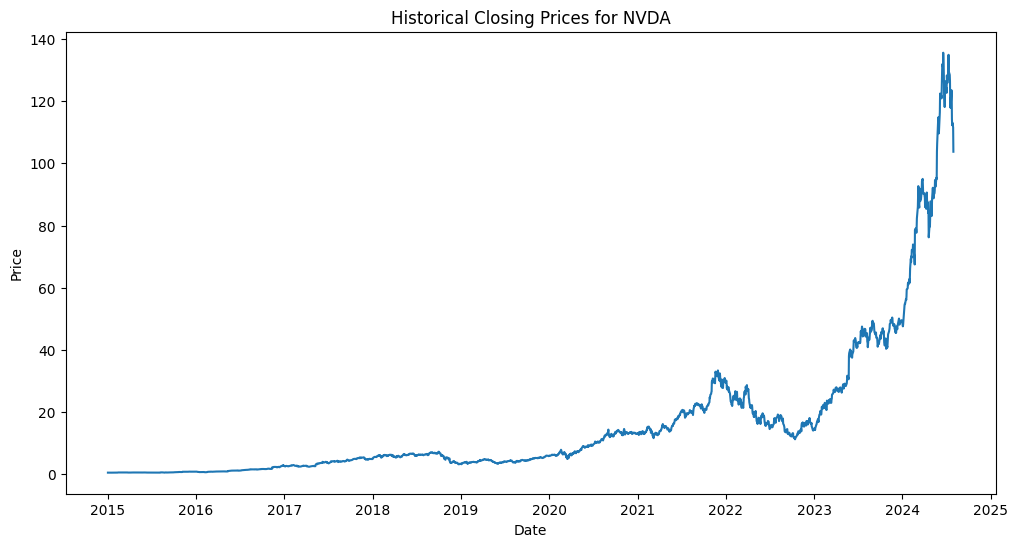

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for an asset (e.g., Apple)
symbol = 'NVDA'
data = yf.download(symbol, start='2015-01-01', end='2024-07-31')

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Plot the historical closing prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title(f'Historical Closing Prices for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


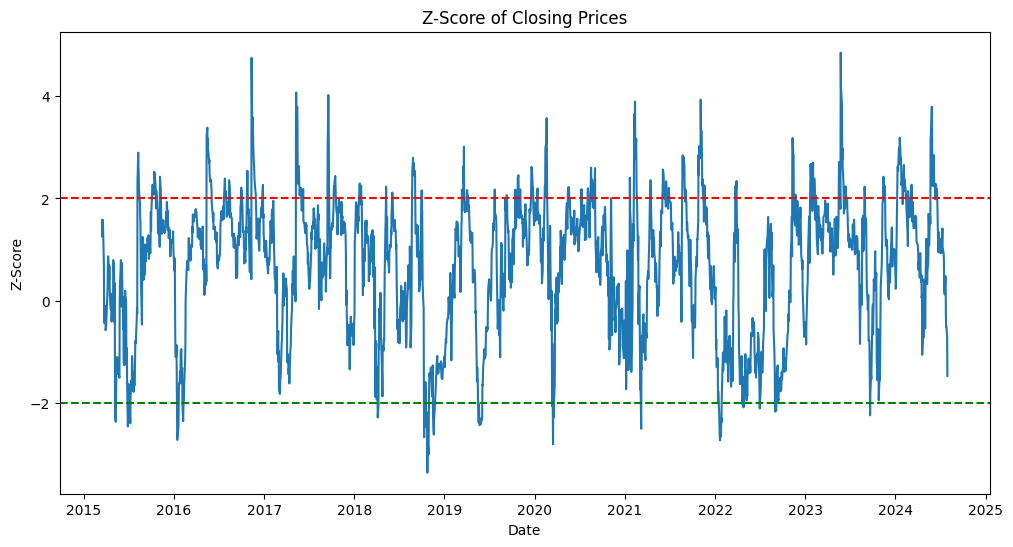

In [19]:
# Define the moving average window
window = 50

# Calculate moving averages and standard deviations
data['Moving_Avg'] = data['Close'].rolling(window=window).mean()
data['Std_Dev'] = data['Close'].rolling(window=window).std()

# Calculate Z-Score
data['Z_Score'] = (data['Close'] - data['Moving_Avg']) / data['Std_Dev']

# Plot the Z-Score
plt.figure(figsize=(12, 6))
plt.plot(data['Z_Score'])
plt.title('Z-Score of Closing Prices')
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.show()


C:\Users\Rajan\AppData\Local\Temp\ipykernel_18352\527463118.py:9: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Position'] = data['Signal'].replace(to_replace=0, method='ffill')


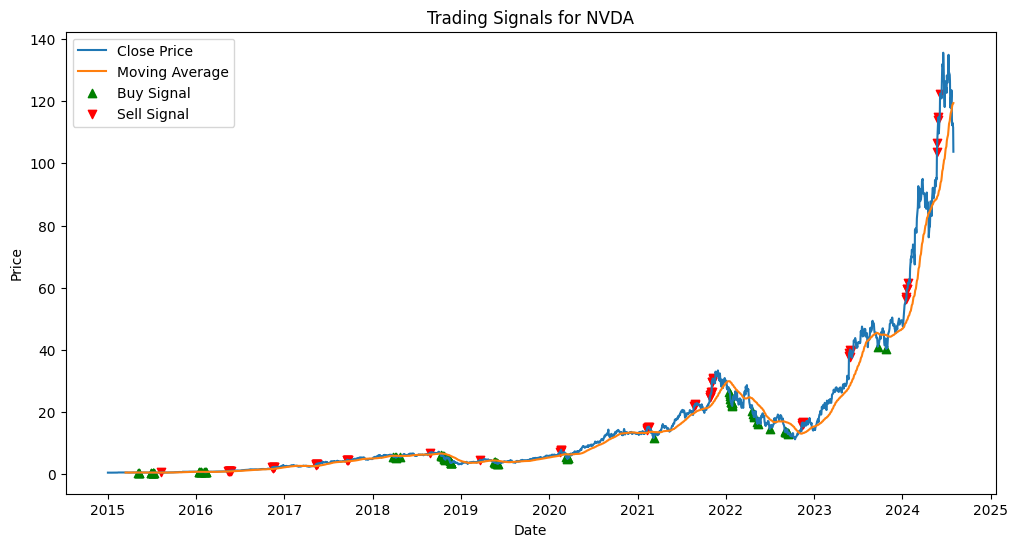

In [20]:
# Initialize signals
data['Signal'] = 0

# Generate buy and sell signals
data.loc[data['Z_Score'] < -1.85, 'Signal'] = 1 # Buy signal
data.loc[data['Z_Score'] > 2.75, 'Signal'] = -1 # Sell signal

# Carry forward the positions
data['Position'] = data['Signal'].replace(to_replace=0, method='ffill')

# Plot signals on price chart
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Moving_Avg'], label='Moving Average')
plt.scatter(data.index[data['Signal'] == 1], data['Close'][data['Signal'] == 1], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(data.index[data['Signal'] == -1], data['Close'][data['Signal'] == -1], marker='v', color='red', label='Sell Signal', alpha=1)
plt.title(f'Trading Signals for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


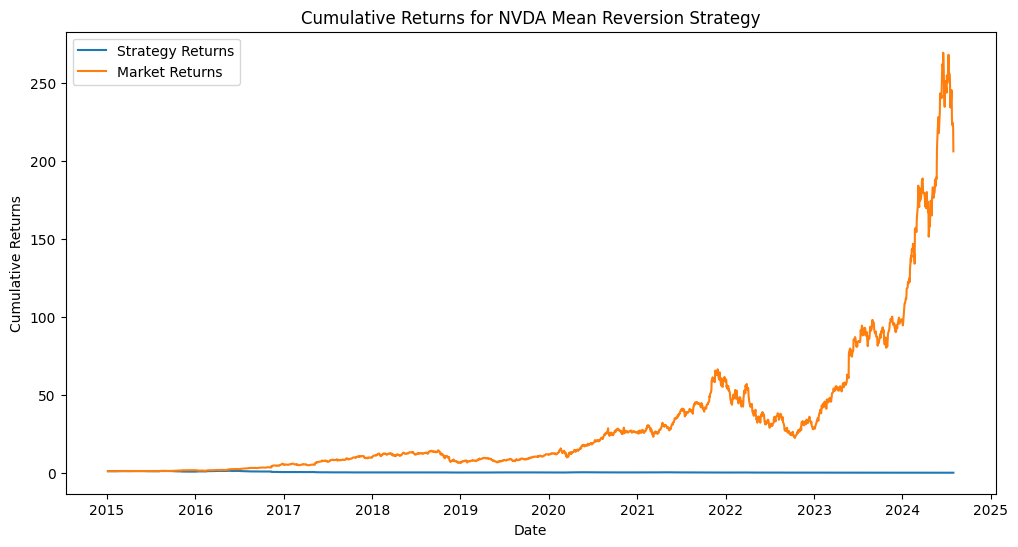

Final Cumulative Strategy Returns: 0.01
Final Cumulative Market Returns: 206.12


In [6]:
# Calculate strategy returns
data['Strategy_Returns'] = data['Position'].shift(1) * data['Returns']

# Calculate cumulative returns
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()
data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.title(f'Cumulative Returns for {symbol} Mean Reversion Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Print final cumulative returns
print(f"Final Cumulative Strategy Returns: {data['Cumulative_Strategy_Returns'].iloc[-1]:.2f}")
print(f"Final Cumulative Market Returns: {data['Cumulative_Market_Returns'].iloc[-1]:.2f}")
